In [6]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import natsort

# Loading Data

In [4]:
# import os
# for dirname, _, filenames in os.walk('/kaggle'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
# Path to the original directory of images
dir_path = 'F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images/'

In [8]:
# Loading train.csv file 
print('Loading Training Data Labels from CSV file')
train = pd.read_csv('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/train.csv')
train.head(6)

Loading Training Data Labels from CSV file


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0


In [9]:
# Create a new column 'label' based on the existing columns
train['label'] = train[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)

# Map the labels to numeric values
label_mapping = {'healthy': 0, 'multiple_diseases': 1, 'rust': 2, 'scab': 3}
train['label'] = train['label'].map(label_mapping)

In [10]:
train.head(5)

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [11]:
print(train.shape)

(1821, 6)


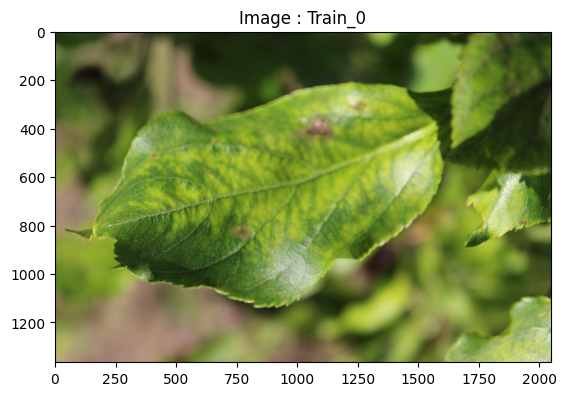

In [14]:
image_open = Image.open(dir_path + 'Train_0.jpg')
plt.imshow(image_open)
plt.title('Image : Train_0')
plt.show()

In [15]:
import re
def get_label(img):
    if re.search('Train',img):
        img = img.split('.')[0] # Fecth image_id from image name
        # return label corresponding to image_id
        label = train.loc[train['image_id'] == img, 'label'].values[0]
        return label
    elif re.search('Test',img):
        pass

In [12]:
# os.makedirs('/kaggle/working/images')

In [16]:
# Path to the extracted images
dir_path2 = 'F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/'

In [17]:
from sklearn.model_selection import train_test_split

def copy_image_to_its_folder(dir_path, dir_path2):
    images = natsort.natsorted([img for img in os.listdir(dir_path) if img.startswith('Train_')])  # Filter images
    
    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    
    # Create train and test directories if they don't exist
    train_dir = os.path.join(dir_path2, 'train')
    test_dir = os.path.join(dir_path2, 'test')
    for directory in [train_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)
    
    # Copy images to train or test directories
    for img in tqdm(train_images):
        copy_image(img, dir_path, train_dir)
    
    for img in tqdm(test_images):
        copy_image(img, dir_path, test_dir)

def copy_image(img, src_dir, dest_dir):
    label = get_label(img)  # Getting label of the image
    src_path = os.path.join(src_dir, img)  # Original path of the image
    dest_label_dir = os.path.join(dest_dir, get_label_folder(label))
    
    if not os.path.exists(dest_label_dir):
        os.makedirs(dest_label_dir)
    
    shutil.copy(src_path, dest_label_dir)

def get_label_folder(label):
    label_mapping = {0: 'healthy', 1: 'multiple_diseases', 2: 'rust', 3: 'scab'}
    return label_mapping[label.item()]

In [18]:
data_dir = copy_image_to_its_folder(dir_path, dir_path2)

  0%|          | 0/1274 [00:00<?, ?it/s]

100%|██████████| 547/547 [00:05<00:00, 103.96it/s]


In [20]:
tr_h = len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/train/healthy'))
tr_s = len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/train/scab'))
tr_r =  len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/train/rust'))
tr_md = len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/train/multiple_diseases'))

te_h = len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/test/healthy'))
te_s = len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/test/scab'))
te_r =  len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/test/rust'))
te_md = len(os.listdir('F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/test/multiple_diseases'))

# print('Images file count:', len(os.listdir('/kaggle/input/plant-pathology-2020-fgvc7/images')))

print('Train Healthy file count:', tr_h)
print('Train Scab file count:', tr_s)
print('Train Rust file count:', tr_r)
print('Train MD file count:', tr_md)
print('Train file count:', tr_h + tr_s + tr_r + tr_md)

print(' ')

print('Test Healthy file count:', te_h)
print('Test Scab file count:', te_s)
print('Test Rust file count:', te_r)
print('Test MD file count:', te_md)
print('Test file count:', te_h + te_s + te_r + te_md)

Train Healthy file count: 368
Train Scab file count: 407
Train Rust file count: 437
Train MD file count: 62
Train file count: 1274
 
Test Healthy file count: 148
Test Scab file count: 185
Test Rust file count: 185
Test MD file count: 29
Test file count: 547


# Image Processing

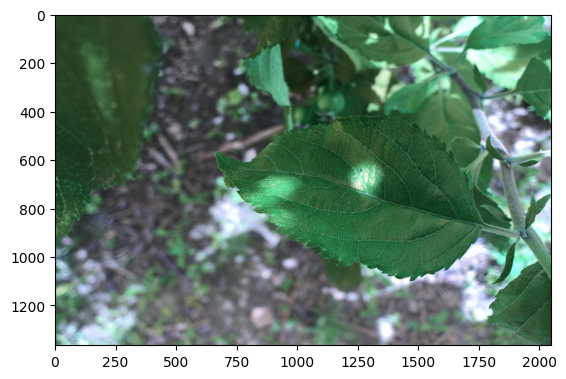

In [21]:
Train_dir = dir_path2 + '/train/'
Categories = ['healthy','multiple_diseases','rust','scab']
for i in Categories:
    path = os.path.join(Train_dir,i)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        new_image=cv2.resize(old_image,(256,256))
        plt.imshow(old_image)
        plt.show()
        break
    break

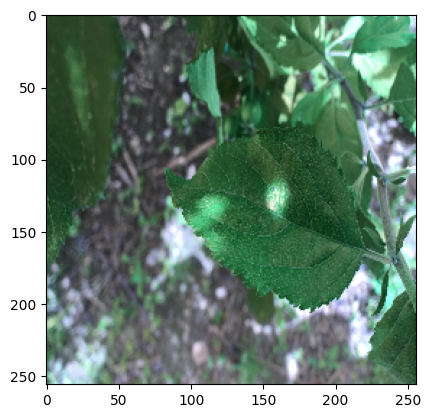

In [22]:
new_image=cv2.resize(old_image,(256,256))
plt.imshow(new_image)
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
datagen = ImageDataGenerator(rescale = 1/255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2)

train_datagen = datagen.flow_from_directory(Train_dir,
                                            target_size = (256,256),
                                            batch_size =16,
                                            class_mode = 'categorical',
                                            subset = 'training')
val_datagen = datagen.flow_from_directory(Train_dir,
                                          target_size = (256,256),
                                          batch_size =16,
                                          class_mode = 'categorical',
                                          subset = 'validation')

Found 1021 images belonging to 4 classes.


Found 253 images belonging to 4 classes.


# CNN Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization

In [26]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)       

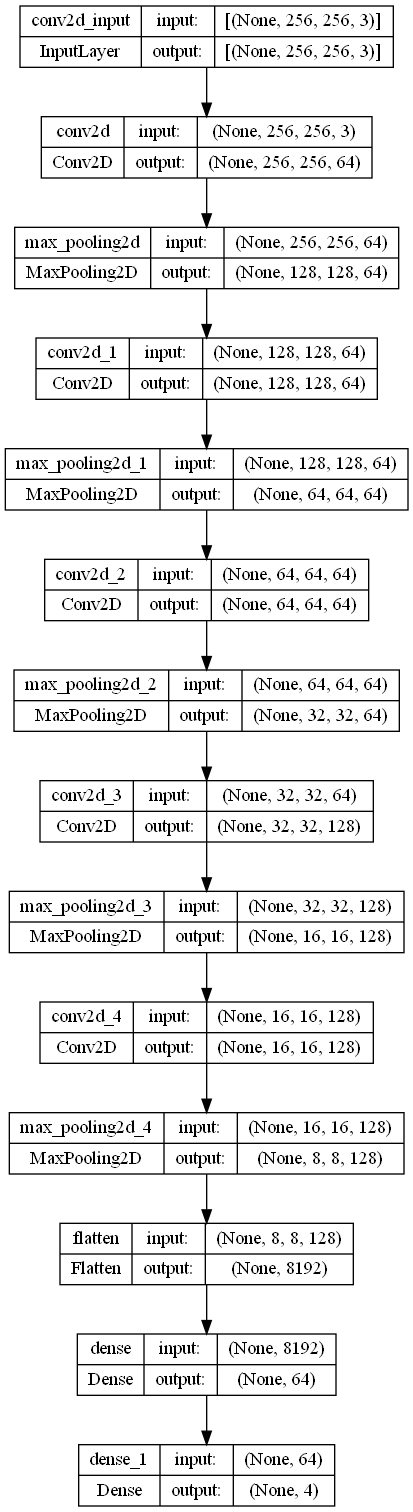

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [28]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
checkpoint=ModelCheckpoint('apple_tree_diseases.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=20,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [33]:
model_history = model.fit(train_datagen, validation_data=val_datagen,
                          epochs = 30,
                          callbacks =callbacks)

Epoch 1/30
64/64 [==============================] - ETA: 0s - loss: 1.2467 - accuracy: 0.3340
Epoch 1: val_loss improved from inf to 1.23583, saving model to apple_tree_diseases.h5
64/64 [==============================] - 159s 2s/step - loss: 1.2467 - accuracy: 0.3340 - val_loss: 1.2358 - val_accuracy: 0.3202
Epoch 2/30
64/64 [==============================] - ETA: 0s - loss: 1.2433 - accuracy: 0.3036
Epoch 2: val_loss did not improve from 1.23583
64/64 [==============================] - 171s 3s/step - loss: 1.2433 - accuracy: 0.3036 - val_loss: 1.2380 - val_accuracy: 0.3202
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 1.2426 - accuracy: 0.3477
Epoch 3: val_loss did not improve from 1.23583
64/64 [==============================] - 165s 3s/step - loss: 1.2426 - accuracy: 0.3477 - val_loss: 1.2366 - val_accuracy: 0.3439
Epoch 4/30
64/64 [==============================] - ETA: 0s - loss: 1.2427 - accuracy: 0.3271
Epoch 4: val_loss did not improve from 1.23583
64/64 

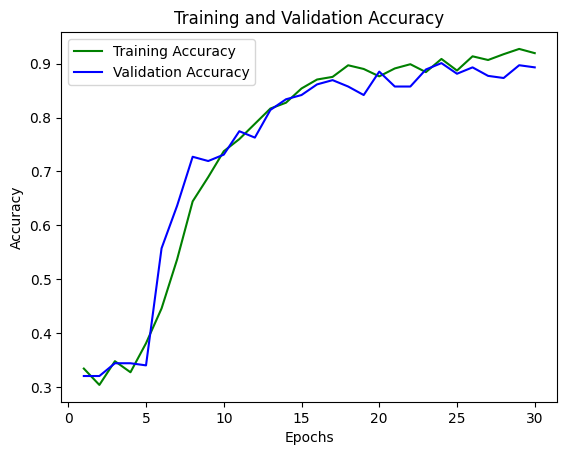

In [34]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,31)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

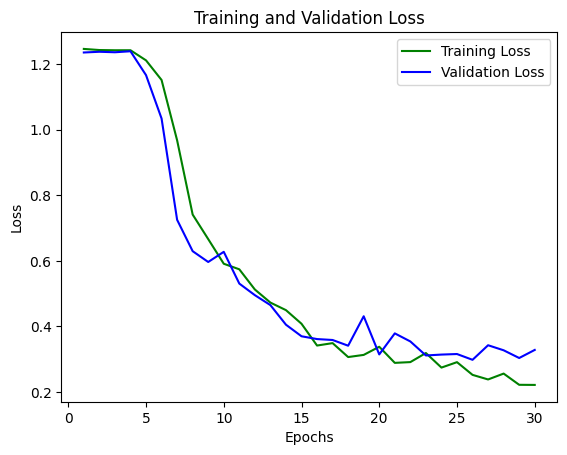

In [35]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Testing

In [36]:
# Path to the test folder
test_folder = 'F:/CVLabs/Project/HassanRizwan_BEE12C_AppleTreeDiseaseDetection/images_sorted/test'

In [38]:
from tensorflow.keras.preprocessing import image

In [39]:
# List to store results
predicted_results = []

# Iterate through all files in the test folder and its subfolders
for root, dirs, files in os.walk(test_folder):
    for file in files:
        if file.endswith(('.jpg')):  # Adjust the file extensions as needed
            # Construct the full path to the image
            test_image_path = os.path.join(root, file)

            # Load and preprocess the image
            image_result = Image.open(test_image_path)
            test_image = image.load_img(test_image_path, target_size=(256, 256))
            test_image = image.img_to_array(test_image)
            test_image = test_image / 255
            test_image = np.expand_dims(test_image, axis=0)

            # Make a prediction and store the result
            result = model.predict(test_image)
            predicted_results.append(np.argmax(result))

# Print or process the results as needed
print(predicted_results)

1/1 [==============================] - 0s 51ms/step
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 1, 3, 2, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 3, 1, 2, 3, 1, 3, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [40]:
np.shape(predicted_results)

(547,)

In [41]:
results = []
for root, dirs, files in os.walk(test_folder):
    for img in files:
        results.append(get_label(img))
    
print(results)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

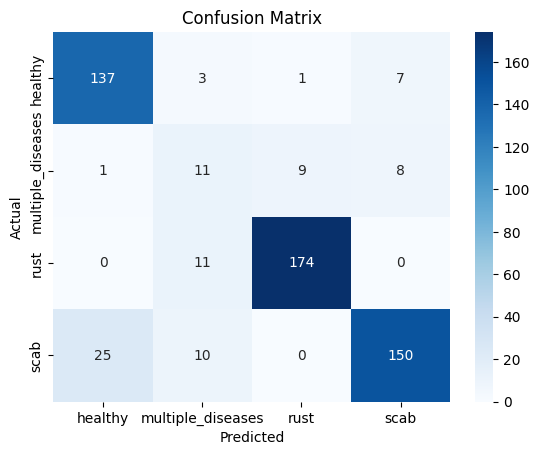

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Create a confusion matrix
conf_mat = confusion_matrix(results, predicted_results)

# Plot the confusion matrix
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels = Categories,
            yticklabels = Categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
# Generate a classification report
class_report = classification_report(results, predicted_results,
                                     target_names=Categories)
print("Classification Report:\n", class_report)

Classification Report:
                    precision    recall  f1-score   support

          healthy       0.84      0.93      0.88       148
multiple_diseases       0.31      0.38      0.34        29
             rust       0.95      0.94      0.94       185
             scab       0.91      0.81      0.86       185

         accuracy                           0.86       547
        macro avg       0.75      0.76      0.76       547
     weighted avg       0.87      0.86      0.87       547

